In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np


In [2]:
df = pd.read_excel("/home/t-daggarwal/MEGA_V3/MultilingualBlanketEval/MEGANotebooks/MEGA_list_of_languages 3.xlsx")

In [3]:
df

,Dataset,Task,Language,Language Tier,Language Code,Language Class,Language Script,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,...,Bing Translator,Google Translator,Systran,Mistral-7B-Instruct-v0.1,GPT4-V Monolingual,GPT4-V Translate-Test,Mistral-7B-v0.1,Metrics_x,Direction,Metrics
0,AfriQA,Question Answering,Bemba,NaN,bem,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.019032,NaN,NaN,0.016606,F1 Score,HigherBetter,F1 Score
1,AfriQA,Question Answering,Fon,NaN,fon,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.056181,NaN,NaN,0.000000,F1 Score,HigherBetter,F1 Score
2,AfriQA,Question Answering,Hausa,NaN,ha,2.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.004167,NaN,NaN,0.016786,F1 Score,HigherBetter,F1 Score
3,AfriQA,Question Answering,Igbo,NaN,ig,1.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000611,NaN,NaN,0.013768,F1 Score,HigherBetter,F1 Score
4,AfriQA,Question Answering,Kinyarwanda,NaN,rw,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.018608,NaN,NaN,0.018718,F1 Score,HigherBetter,F1 Score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,XstoryCloze,Commonsense Reasoning,Burmese,NaN,my,1.0,Brahmic,0.473858,0.901390,0.580410,...,NaN,NaN,NaN,0.000662,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
358,XstoryCloze,Commonsense Reasoning,Russian,2.0,ru,4.0,Cyrillic,0.941760,0.968895,0.949702,...,NaN,NaN,NaN,0.008604,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
359,XstoryCloze,Commonsense Reasoning,Swahili,NaN,sw,2.0,Latin,0.780940,0.906684,0.775645,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
360,XstoryCloze,Commonsense Reasoning,Telugu,NaN,te,1.0,Brahmic,0.576439,0.943084,0.630046,...,NaN,NaN,NaN,0.411950,NaN,NaN,0.175381,Accuracy,HigherBetter,Accuracy


In [4]:
# Identify unique models, languages, and tasks
models = list(df.iloc[:,7:-3].columns)
print(models)
languages = df['Language'].unique()
tasks = df['Dataset'].unique()

# Create mappings from models, languages, and tasks to indices
model_to_index = {model: i for i, model in enumerate(models)}
language_to_index = {language: i for i, language in enumerate(languages)}
task_to_index = {task: i for i, task in enumerate(tasks)}

# Initialize 3D tensor with zeros
tensor = np.zeros((len(models), len(languages), len(tasks)))

# Fill in the tensor
for _, row in df.iterrows():
    for model in models:
        
        model_index = model_to_index[model]
        language_index = language_to_index[row['Language']]
        task_index = task_to_index[row['Dataset']]
        tensor[model_index, language_index, task_index] = row[model] if not pd.isna(row[model]) else 0

['DV003 Monolingual', 'DV003 TranslateTest', 'DV003 Zero-Shot Cross Lingual', 'IndicTrans2', 'GPT-3.5-Turbo Monolingual', 'GPT-3.5-Turbo Translate-Test', 'GPT-3.5-Turbo Zero-Shot Cross Lingual', 'GPT-4 Monolingual', 'GPT-4 Translate-Test', 'GPT-4 Zero-Shot Cross Lingual', 'TULRv6', 'BLOOMZ', 'XLM-R', 'mBERT', 'MuRIL', 'XGLM', 'mT5', 'PaLM2 Zero-Shot', 'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual', 'Llama2-70B Monolingual', 'LLaVa-1.5-13B Monolingual', 'LLaVa-1.5-13B Translate-Test', 'Bing Translator', 'Google Translator', 'Systran', 'Mistral-7B-Instruct-v0.1', 'GPT4-V Monolingual', 'GPT4-V Translate-Test', 'Mistral-7B-v0.1']


In [5]:
tensor

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [37]:
df

,Dataset,Task,Language,Language Tier,Language Code,Language Class,Language Script,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,...,Bing Translator,Google Translator,Systran,Mistral-7B-Instruct-v0.1,GPT4-V Monolingual,GPT4-V Translate-Test,Mistral-7B-v0.1,Metrics_x,Direction,Metrics
0,AfriQA,Question Answering,Bemba,NaN,bem,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.019032,NaN,NaN,0.016606,F1 Score,HigherBetter,F1 Score
1,AfriQA,Question Answering,Fon,NaN,fon,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.056181,NaN,NaN,0.000000,F1 Score,HigherBetter,F1 Score
2,AfriQA,Question Answering,Hausa,NaN,ha,2.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.004167,NaN,NaN,0.016786,F1 Score,HigherBetter,F1 Score
3,AfriQA,Question Answering,Igbo,NaN,ig,1.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000611,NaN,NaN,0.013768,F1 Score,HigherBetter,F1 Score
4,AfriQA,Question Answering,Kinyarwanda,NaN,rw,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.018608,NaN,NaN,0.018718,F1 Score,HigherBetter,F1 Score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,XstoryCloze,Commonsense Reasoning,Burmese,NaN,my,1.0,Brahmic,0.473858,0.901390,0.580410,...,NaN,NaN,NaN,0.000662,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
358,XstoryCloze,Commonsense Reasoning,Russian,2.0,ru,4.0,Cyrillic,0.941760,0.968895,0.949702,...,NaN,NaN,NaN,0.008604,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
359,XstoryCloze,Commonsense Reasoning,Swahili,NaN,sw,2.0,Latin,0.780940,0.906684,0.775645,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
360,XstoryCloze,Commonsense Reasoning,Telugu,NaN,te,1.0,Brahmic,0.576439,0.943084,0.630046,...,NaN,NaN,NaN,0.411950,NaN,NaN,0.175381,Accuracy,HigherBetter,Accuracy


In [38]:
list(df.columns)[7:-3]

['DV003 Monolingual',
 'DV003 TranslateTest',
 'DV003 Zero-Shot Cross Lingual',
 'IndicTrans2',
 'GPT-3.5-Turbo Monolingual',
 'GPT-3.5-Turbo Translate-Test',
 'GPT-3.5-Turbo Zero-Shot Cross Lingual',
 'GPT-4 Monolingual',
 'GPT-4 Translate-Test',
 'GPT-4 Zero-Shot Cross Lingual',
 'TULRv6',
 'BLOOMZ',
 'XLM-R',
 'mBERT',
 'MuRIL',
 'XGLM',
 'mT5',
 'PaLM2 Zero-Shot',
 'PaLM2 Monolingual',
 'Llama2-7B Monolingual',
 'Llama2-13B Monolingual',
 'Llama2-70B Monolingual',
 'LLaVa-1.5-13B Monolingual',
 'LLaVa-1.5-13B Translate-Test',
 'Bing Translator',
 'Google Translator',
 'Systran',
 'Mistral-7B-Instruct-v0.1',
 'GPT4-V Monolingual',
 'GPT4-V Translate-Test',
 'Mistral-7B-v0.1']

In [39]:
grouped_df  = df.groupby('Language').sum()

grouped_df

,Dataset,Task,Language Tier,Language Code,Language Class,Language Script,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,IndicTrans2,...,Bing Translator,Google Translator,Systran,Mistral-7B-Instruct-v0.1,GPT4-V Monolingual,GPT4-V Translate-Test,Mistral-7B-v0.1,Metrics_x,Direction,Metrics
Language,,,,,,,,,,,,,,,,,,,,,
Afrikaans,PAN-XUDPOS,Name Entity RecognitionPart of Speech Tagging,0.0,afaf,6.0,LatinLatin,0.000000,0.000000,0.000000,0.000,...,0.00,0.000,0.000,0.000000,0.000000,0.0,0.000000,F1 ScoreF1 Score,HigherBetterHigherBetter,F1 ScoreF1 Score
Amharic,XLSum,Summarization,0.0,am,2.0,Ge'ez,0.000000,0.000000,0.000000,0.000,...,0.00,0.000,0.000,0.000000,0.000000,0.0,0.000000,ROUGE-L,HigherBetter,ROUGE-L
Arabic,BelebeleMLQAPAN-XTyDiQA-GoldPUDPOSWinoMTXLSumX...,Multiple Choice Reading ComprehensionQuestion ...,22.0,ararararararararararar,55.0,ArabicArabicArabicArabicArabicArabicArabicArab...,3.259506,2.082549,2.330768,0.000,...,0.45,0.458,0.456,1.101826,0.366382,0.0,1.243462,AccuracyF1 ScoreF1 ScoreF1 ScoreF1 ScoreAccura...,HigherBetterHigherBetterHigherBetterHigherBett...,AccuracyF1 ScoreF1 ScoreF1 ScoreF1 ScoreAccura...
Assamese,IN22_conv_en_indicIN22_conv_indic_enIN22_gen_i...,Machine TranslationMachine TranslationMachine ...,0.0,asasasasasas,2.0,BrahmicBrahmic,0.485828,0.559880,0.486916,2.226,...,0.00,0.000,0.000,0.000000,0.000000,0.0,0.000000,ChrF++ChrF++ChrF++ChrF++F1 ScoreAccuracy,HigherBetterHigherBetterHigherBetterHigherBett...,ChrF++ChrF++ChrF++ChrF++F1 ScoreAccuracy
Azerbaijani,PAN-XXLSum,Name Entity RecognitionSummarization,0.0,azaz,2.0,LatinLatin,0.000000,0.000000,0.000000,0.000,...,0.00,0.000,0.000,0.000000,0.000000,0.0,0.000000,F1 ScoreROUGE-L,HigherBetterHigherBetter,F1 ScoreROUGE-L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnamese,MLQAPAN-XUDPOSXCOPAXLSumXNLIXQuAD,Question AnsweringName Entity RecognitionPart ...,21.0,vivivivivivivi,28.0,LatinLatinLatinLatinLatinLatinLatin,1.041202,1.178246,0.982372,0.000,...,0.00,0.000,0.000,1.562400,0.000000,0.0,1.792241,F1 ScoreF1 ScoreF1 ScoreAccuracyROUGE-LAccurac...,HigherBetterHigherBetterHigherBetterHigherBett...,F1 ScoreF1 ScoreF1 ScoreAccuracyROUGE-LAccurac...
Welsh,XLSum,Summarization,0.0,cy,1.0,Latin,0.000000,0.000000,0.000000,0.000,...,0.00,0.000,0.000,0.000000,0.000000,0.0,0.000000,ROUGE-L,HigherBetter,ROUGE-L
Wolof,AfriQAUDPOS,Question AnsweringPart of Speech Tagging,0.0,wowo,4.0,LatinLatin,0.000000,0.000000,0.000000,0.000,...,0.00,0.000,0.000,0.011049,0.000000,0.0,0.007735,F1 ScoreF1 Score,HigherBetterHigherBetter,F1 ScoreF1 Score


In [40]:
exclude_words =['translatetest', 'cross lingual', 'translate-test']

# monolingual_columns = [column for column in df.columns if not any(word.lower() in column.lower() for word in exclude_words)]

# monolingual_columns

In [41]:
new_df = df[df['Dataset'] == "XNLI"]

# Assuming new_df is your DataFrame
non_nan_columns = new_df.columns[new_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = new_df[non_nan_monolingual_columns]


new_df = new_df[["Language"] + list(new_df.iloc[:, 6:-3].columns)].set_index("Language")

new_df

['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'DV003 Monolingual', 'GPT-3.5-Turbo Monolingual', 'GPT-4 Monolingual', 'TULRv6', 'BLOOMZ', 'XLM-R', 'mBERT', 'XGLM', 'mT5', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual', 'Llama2-70B Monolingual', 'Mistral-7B-Instruct-v0.1', 'Mistral-7B-v0.1', 'Metrics_x', 'Direction', 'Metrics']


,DV003 Monolingual,GPT-3.5-Turbo Monolingual,GPT-4 Monolingual,TULRv6,BLOOMZ,XLM-R,mBERT,XGLM,mT5,Llama2-7B Monolingual,Llama2-13B Monolingual,Llama2-70B Monolingual,Mistral-7B-Instruct-v0.1,Mistral-7B-v0.1
Language,,,,,,,,,,,,,,
Arabic,0.522156,0.589820,0.731138,0.8898,0.606827,0.772,0.643,0.464,0.733,0.39,0.370,0.3500,0.349140,0.385542
Bulgarian,0.618164,0.635130,0.772655,0.9057,0.465462,0.830,0.680,0.489,0.786,0.45,0.510,0.5500,0.402794,0.417936
German,0.657884,0.673253,0.788024,0.8998,0.540161,0.825,0.700,0.456,0.774,0.45,0.500,0.5800,0.384750,0.416392
Greek,0.597006,0.650898,0.790419,0.9019,0.474297,0.808,0.653,0.487,0.771,0.39,0.000,0.4130,0.351497,0.380676
English,0.795210,0.762475,0.849102,0.9325,0.674699,0.887,0.808,0.526,0.847,0.56,0.550,0.6330,0.433932,0.410678
Spanish,0.709980,0.703194,0.788000,0.9113,0.612450,0.837,0.735,0.458,0.803,0.50,0.510,0.5500,0.406986,0.446906
French,0.656886,0.677046,0.794600,0.9071,0.613655,0.822,0.734,0.494,0.791,0.50,0.520,0.5500,0.413539,0.490885
Hindi,0.476248,0.554890,0.719960,0.8618,0.568273,0.756,0.589,0.468,0.708,0.37,0.000,0.3110,0.345977,0.409281
Russian,0.622156,0.624950,0.743114,0.8922,0.533333,0.791,0.678,0.486,0.771,0.48,0.500,0.5450,0.429547,0.400399


In [42]:
new_df.transpose()

Language,Arabic,Bulgarian,German,Greek,English,Spanish,French,Hindi,Russian,Swahili,Thai,Turkish,Urdu,Vietnamese,Chinese
DV003 Monolingual,0.522156,0.618164,0.657884,0.597006,0.795210,0.709980,0.656886,0.476248,0.622156,0.502196,0.510579,0.578643,0.499601,0.564072,0.580439
GPT-3.5-Turbo Monolingual,0.589820,0.635130,0.673253,0.650898,0.762475,0.703194,0.677046,0.554890,0.624950,0.563074,0.539920,0.626148,0.490818,0.608782,0.621158
GPT-4 Monolingual,0.731138,0.772655,0.788024,0.790419,0.849102,0.788000,0.794600,0.719960,0.743114,0.708982,0.688224,0.762874,0.681238,0.742914,0.745900
TULRv6,0.889800,0.905700,0.899800,0.901900,0.932500,0.911300,0.907100,0.861800,0.892200,0.854600,0.875000,0.884400,0.827100,0.889800,0.884400
BLOOMZ,0.606827,0.465462,0.540161,0.474297,0.674699,0.612450,0.613655,0.568273,0.533333,0.503614,0.437751,0.427309,0.499598,0.610040,0.567470
XLM-R,0.772000,0.830000,0.825000,0.808000,0.887000,0.837000,0.822000,0.756000,0.791000,0.712000,0.774000,0.780000,0.717000,0.793000,0.782000
mBERT,0.643000,0.680000,0.700000,0.653000,0.808000,0.735000,0.734000,0.589000,0.678000,0.497000,0.541000,0.609000,0.572000,0.693000,0.678000
XGLM,0.464000,0.489000,0.456000,0.487000,0.526000,0.458000,0.494000,0.468000,0.486000,0.445000,0.466000,0.454000,0.434000,0.485000,0.488000
mT5,0.733000,0.786000,0.774000,0.771000,0.847000,0.803000,0.791000,0.708000,0.771000,0.694000,0.732000,0.728000,0.683000,0.742000,0.741000
Llama2-7B Monolingual,0.390000,0.450000,0.450000,0.390000,0.560000,0.500000,0.500000,0.370000,0.480000,0.330000,0.350000,0.400000,0.360000,0.410000,0.450000


In [43]:
xnli_df = df[df["Dataset"] == "XNLI"]


non_nan_columns = xnli_df.columns[xnli_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = xnli_df[non_nan_monolingual_columns]


new_df = new_df[list(new_df.iloc[:, 6:-3].columns)]


z_score = new_df.apply(lambda x: (x-x.mean())/x.std(), axis=1)

# z_score = z_score.transpose()


['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'DV003 Monolingual', 'GPT-3.5-Turbo Monolingual', 'GPT-4 Monolingual', 'TULRv6', 'BLOOMZ', 'XLM-R', 'mBERT', 'XGLM', 'mT5', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual', 'Llama2-70B Monolingual', 'Mistral-7B-Instruct-v0.1', 'Mistral-7B-v0.1', 'Metrics_x', 'Direction', 'Metrics']


In [44]:
z_score

,DV003 Monolingual,GPT-3.5-Turbo Monolingual,GPT-4 Monolingual,TULRv6,BLOOMZ,XLM-R,mBERT,XGLM,mT5,Llama2-7B Monolingual,Llama2-13B Monolingual,Llama2-70B Monolingual,Mistral-7B-Instruct-v0.1,Mistral-7B-v0.1
318,-0.193828,0.183790,0.972442,1.857892,0.278701,1.200483,0.480570,-0.518378,0.982835,-0.931352,-1.042966,-1.154580,-1.159379,-0.956229
319,0.061282,0.164187,0.998324,1.805291,-0.864907,1.346144,0.436341,-0.722141,1.079268,-0.958690,-0.594769,-0.352155,-1.245008,-1.153169
320,0.243305,0.335944,1.027731,1.701469,-0.466280,1.250607,0.497161,-0.973566,0.943201,-1.009731,-0.708353,-0.226148,-1.403032,-1.212308
321,0.205752,0.430933,1.013903,1.479711,-0.306971,1.087363,0.439715,-0.253894,0.932763,-0.659195,-2.288759,-0.563093,-0.820075,-0.698154
322,0.604800,0.415391,0.916632,1.399193,-0.092502,1.135920,0.678808,-0.952906,0.904471,-0.756174,-0.814036,-0.333780,-1.485630,-1.620186
323,0.422040,0.380613,0.898312,1.650995,-0.173332,1.197432,0.574774,-1.116169,0.989879,-0.859780,-0.798735,-0.554556,-1.427583,-1.183891
324,0.109073,0.241937,1.016690,1.758133,-0.175850,1.197272,0.617299,-0.964446,0.992964,-0.924902,-0.793090,-0.595372,-1.494733,-0.984975
325,-0.151796,0.203066,0.947917,1.587946,0.263454,1.110541,0.356981,-0.189012,0.893949,-0.631221,-2.300785,-0.897449,-0.739620,-0.453970
326,0.101766,0.120416,0.909018,1.903992,-0.491020,1.228602,0.474461,-0.806911,1.095125,-0.846954,-0.713478,-0.413156,-1.183665,-1.378195
327,-0.086193,0.275107,1.141040,2.005251,-0.077772,1.158951,-0.117027,-0.425636,1.052125,-1.108136,-0.930093,-0.746115,-1.077692,-1.063810


In [45]:
spearman_corr_matrix = z_score.corr(method='spearman')

print(spearman_corr_matrix)

                           DV003 Monolingual  GPT-3.5-Turbo Monolingual  \
DV003 Monolingual                   1.000000                   0.617857   
GPT-3.5-Turbo Monolingual           0.617857                   1.000000   
GPT-4 Monolingual                  -0.089286                   0.107143   
TULRv6                             -0.467857                  -0.621429   
BLOOMZ                             -0.539286                  -0.150000   
XLM-R                              -0.071429                  -0.510714   
mBERT                               0.332143                   0.092857   
XGLM                               -0.600000                  -0.167857   
mT5                                -0.025000                  -0.475000   
Llama2-7B Monolingual               0.239286                   0.182143   
Llama2-13B Monolingual              0.125000                  -0.221429   
Llama2-70B Monolingual              0.635714                   0.114286   
Mistral-7B-Instruct-v0.1 

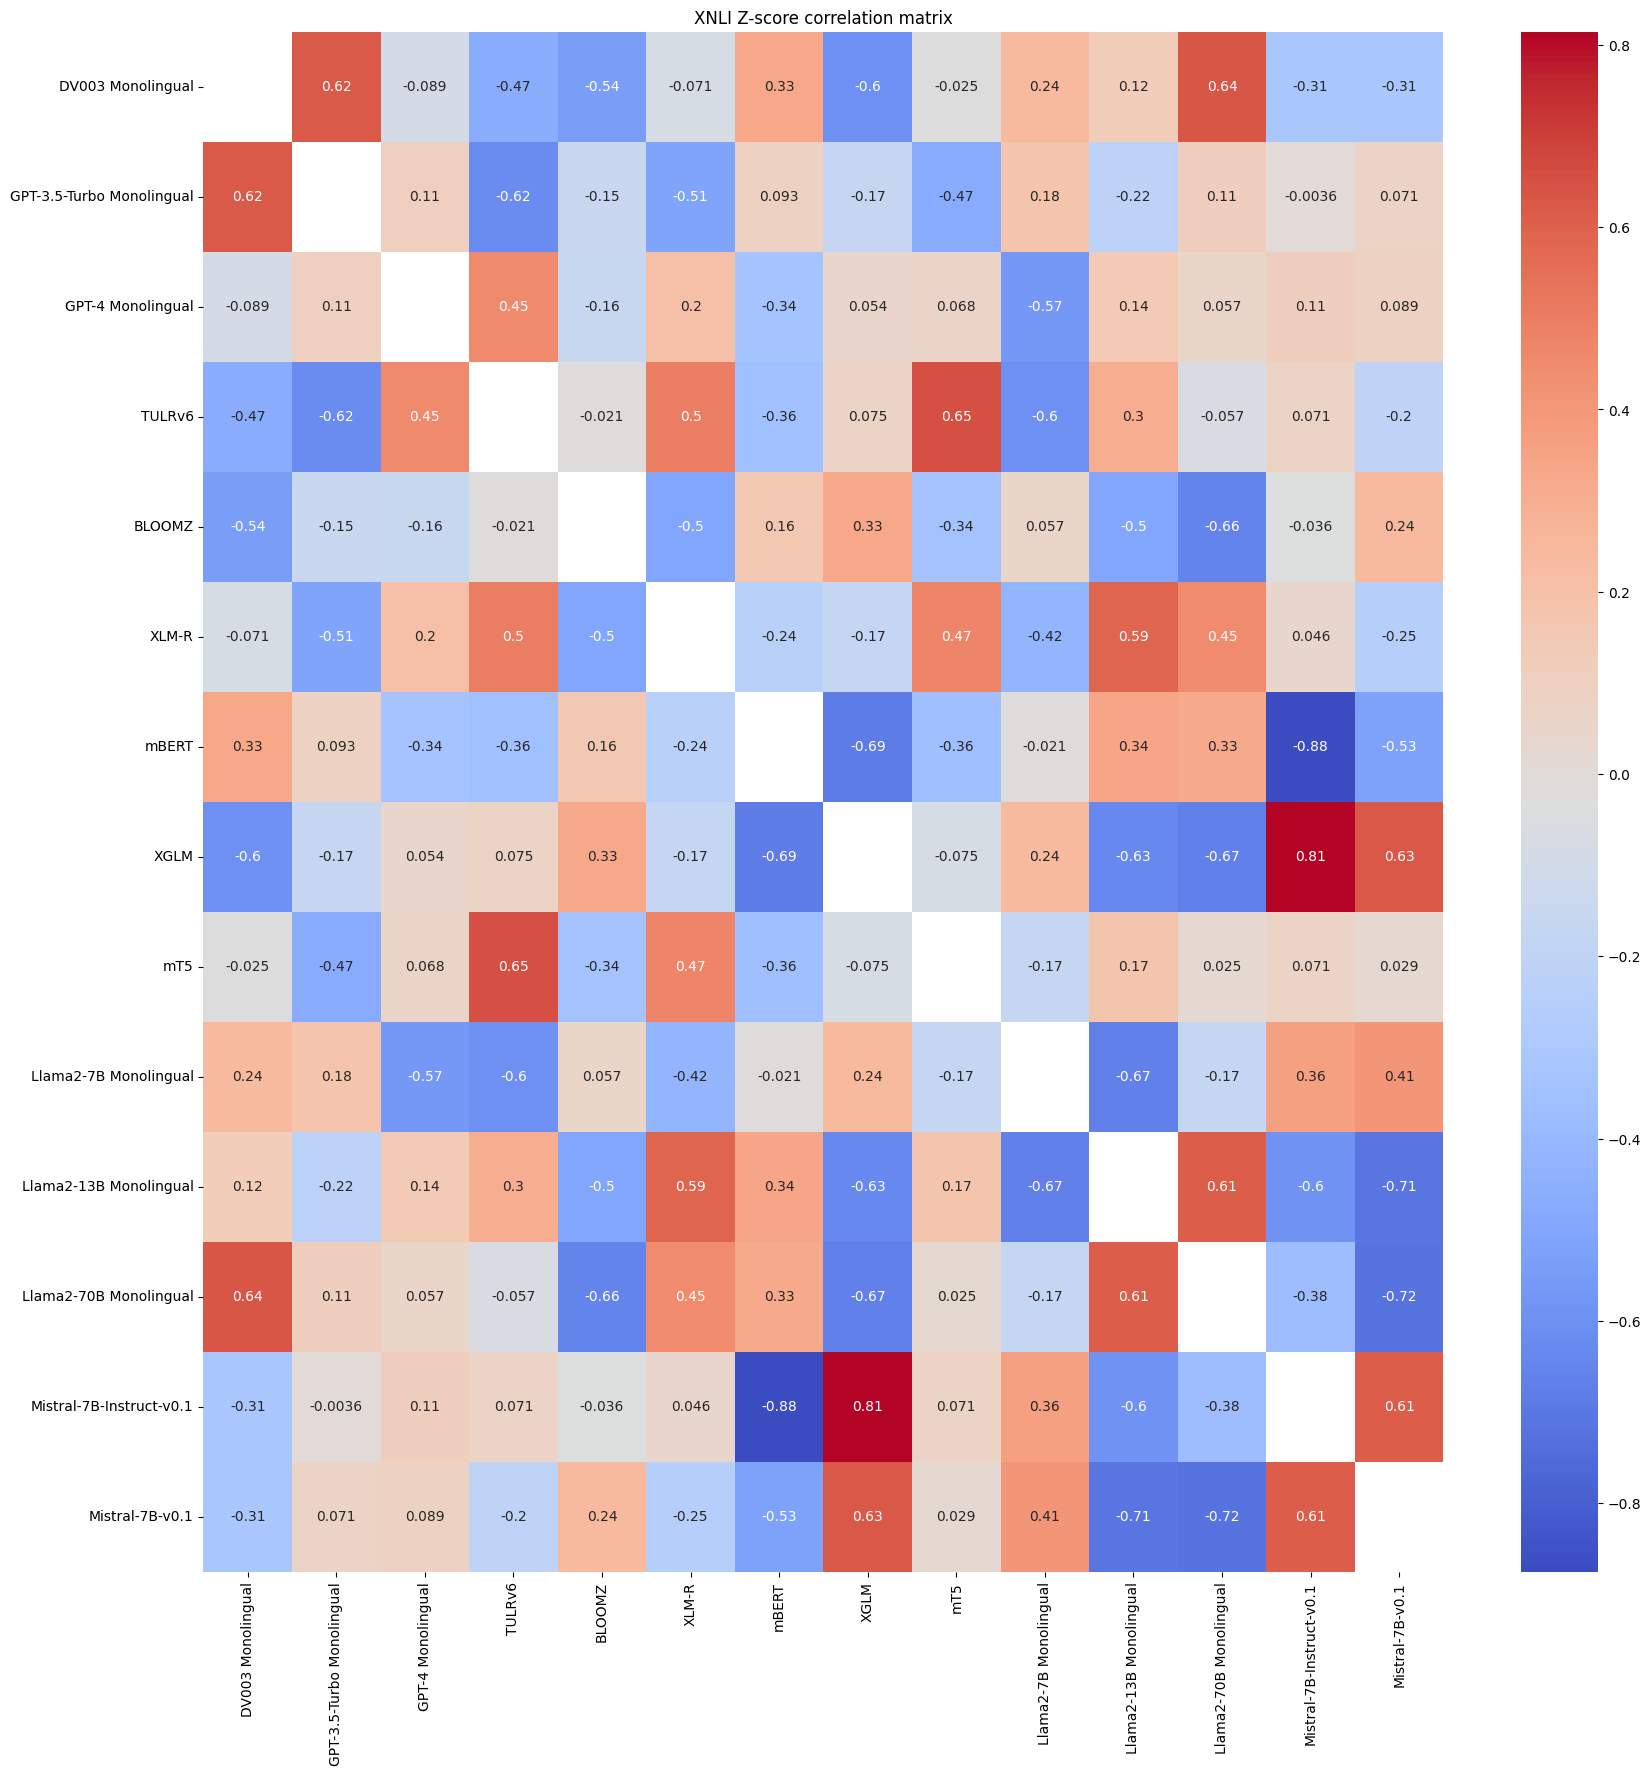

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))


np.fill_diagonal(spearman_corr_matrix.values, np.nan)


# Assuming spearman_corr_matrix is your correlation matrix
ax = sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')


ax.set_title("XNLI Z-score correlation matrix")
plt.show()

In [47]:
# np.fill_diagonalspearman_corr_matrix, np.nan)

                           DV003 Monolingual  GPT-3.5-Turbo Monolingual  \
DV003 Monolingual                   1.000000                   0.617857   
GPT-3.5-Turbo Monolingual           0.617857                   1.000000   
GPT-4 Monolingual                  -0.089286                   0.107143   
TULRv6                             -0.467857                  -0.621429   
BLOOMZ                             -0.539286                  -0.150000   
XLM-R                              -0.071429                  -0.510714   
mBERT                               0.332143                   0.092857   
XGLM                               -0.600000                  -0.167857   
mT5                                -0.025000                  -0.475000   
Llama2-7B Monolingual               0.239286                   0.182143   
Llama2-13B Monolingual              0.125000                  -0.221429   
Llama2-70B Monolingual              0.635714                   0.114286   
Mistral-7B-Instruct-v0.1 

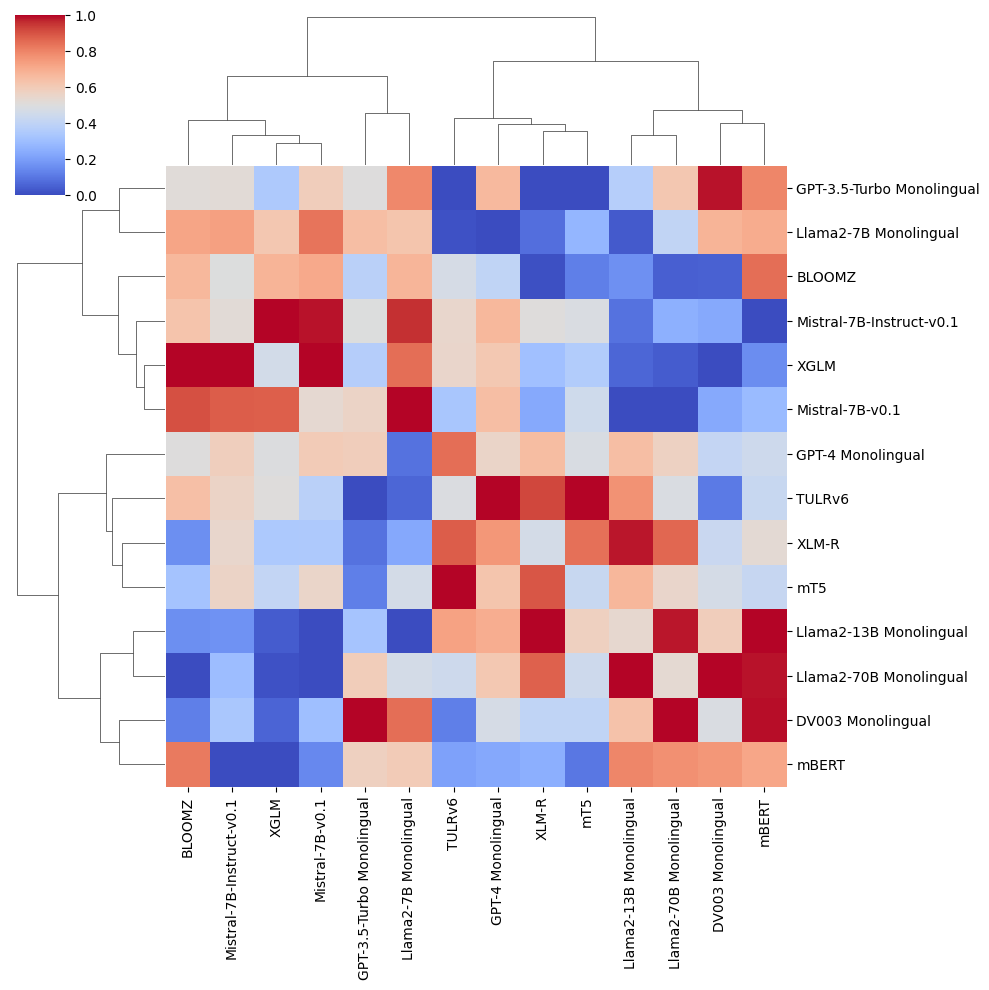

In [50]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Set the diagonal to np.nan


spearman_corr_matrix = z_score.corr(method='spearman')

print(spearman_corr_matrix)

np.fill_diagonal(spearman_corr_matrix.values, 0)

# Rescale the values to be between 0 and 1
scaler = MinMaxScaler()
spearman_corr_matrix = pd.DataFrame(scaler.fit_transform(spearman_corr_matrix), 
                                    columns=spearman_corr_matrix.columns, 
                                    index=spearman_corr_matrix.index)

# display(spearman_corr_matrix)

# Plot the heatmap
sns.clustermap(spearman_corr_matrix, metric = "correlation", method="average", cmap="coolwarm", standard_scale=1)
plt.show()

In [29]:
z_score.values

array([[-0.19382779,  0.1837897 ,  0.97244218,  1.85789171,  0.27870071,
         1.20048304,  0.48057032, -0.51837834,  0.98283501, -0.93135153,
        -1.0429659 , -1.15458028, -1.15937942, -0.95622943],
       [ 0.06128207,  0.16418723,  0.99832435,  1.80529087, -0.8649072 ,
         1.34614379,  0.43634111, -0.72214096,  1.07926833, -0.95868966,
        -0.59476859, -0.35215454, -1.24500813, -1.15316868],
       [ 0.24330506,  0.33594434,  1.02773117,  1.70146898, -0.46627981,
         1.25060684,  0.49716075, -0.97356603,  0.94320084, -1.00973144,
        -0.708353  , -0.2261475 , -1.40303205, -1.21230814],
       [ 0.2057519 ,  0.43093341,  1.01390329,  1.47971125, -0.30697139,
         1.0873625 ,  0.43971548, -0.25389358,  0.93276289, -0.65919527,
        -2.28875873, -0.5630928 , -0.82007494, -0.69815401],
       [ 0.60480012,  0.41539093,  0.9166323 ,  1.39919262, -0.09250175,
         1.13591963,  0.67880829, -0.95290562,  0.90447085, -0.75617416,
        -0.81403635, -0.33

In [31]:
sns.clustermap(spearman_corr_matrix, "euclidean", method="single", cmap="coolwarm", standard_scale=1)
plt.show()

TypeError: clustermap() takes 1 positional argument but 2 positional arguments (and 2 keyword-only arguments) were given

In [32]:
from sklearn.cluster import DBSCAN

xnli_df = df[df["Dataset"] == "XNLI"]


non_nan_columns = xnli_df.columns[xnli_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

# print(non_nan_monolingual_columns)

new_df = xnli_df[non_nan_monolingual_columns]


new_df = new_df[["Language"] + list(new_df.iloc[:, 6:-3].columns)].set_index("Language")

# display(new_df)

z_score = new_df.apply(lambda x: (x-x.mean())/x.std(), axis=1)
z_score = z_score.transpose().reset_index().rename(columns={"index": "Model"}).set_index("Model")
z_score.columns.name = None
display(z_score)

# print(z_score.columns.name)


# Assuming new_data is your DataFrame
# Initialize DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=1)

# Fit the model
dbscan.fit(z_score.values)

# Get the cluster labels
labels = dbscan.labels_

print(labels)

,Arabic,Bulgarian,German,Greek,English,Spanish,French,Hindi,Russian,Swahili,Thai,Turkish,Urdu,Vietnamese,Chinese
Model,,,,,,,,,,,,,,,
DV003 Monolingual,-0.193828,0.061282,0.243305,0.205752,0.604800,0.422040,0.109073,-0.151796,0.101766,-0.086193,0.062654,0.065899,-0.074954,-0.124708,-0.089703
GPT-3.5-Turbo Monolingual,0.183790,0.164187,0.335944,0.430933,0.415391,0.380613,0.241937,0.203066,0.120416,0.275107,0.193095,0.347934,-0.128797,0.137931,0.176426
GPT-4 Monolingual,0.972442,0.998324,1.027731,1.013903,0.916632,0.898312,1.016690,0.947917,0.909018,1.141040,0.852399,1.159676,1.038620,0.925846,0.991720
TULRv6,1.857892,1.805291,1.701469,1.479711,1.399193,1.650995,1.758133,1.587946,1.903992,2.005251,1.682740,1.881172,1.932870,1.788680,1.896932
BLOOMZ,0.278701,-0.864907,-0.466280,-0.306971,-0.092502,-0.173332,-0.175850,0.263454,-0.491020,-0.077772,-0.261113,-0.832566,-0.074968,0.145319,-0.174467
XLM-R,1.200483,1.346144,1.250607,1.087363,1.135920,1.197432,1.197272,1.110541,1.228602,1.158951,1.233730,1.261352,1.257872,1.220059,1.227663
mBERT,0.480570,0.436341,0.497161,0.439715,0.678808,0.574774,0.617299,0.356981,0.474461,-0.117027,0.197896,0.246129,0.368909,0.632640,0.547938
XGLM,-0.518378,-0.722141,-0.973566,-0.253894,-0.952906,-1.116169,-0.964446,-0.189012,-0.806911,-0.425636,-0.135528,-0.674102,-0.477137,-0.589190,-0.693869
mT5,0.982835,1.079268,0.943201,0.932763,0.904471,0.989879,0.992964,0.893949,1.095125,1.052125,1.047013,0.952629,1.049426,0.920476,0.959695


[0 0 1 2 3 1 0 4 1 4 5 6 4 4]


In [33]:
from collections import defaultdict


# Create a dictionary where the keys are the cluster labels and the values are the data points
cluster_dict = defaultdict(list)

for label, datapoint in zip(labels, z_score.index):
    cluster_dict[label].append(datapoint)

print(cluster_dict)

defaultdict(<class 'list'>, {0: ['DV003 Monolingual', 'GPT-3.5-Turbo Monolingual', 'mBERT'], 1: ['GPT-4 Monolingual', 'XLM-R', 'mT5'], 2: ['TULRv6'], 3: ['BLOOMZ'], 4: ['XGLM', 'Llama2-7B Monolingual', 'Mistral-7B-Instruct-v0.1', 'Mistral-7B-v0.1'], 5: ['Llama2-13B Monolingual'], 6: ['Llama2-70B Monolingual']})


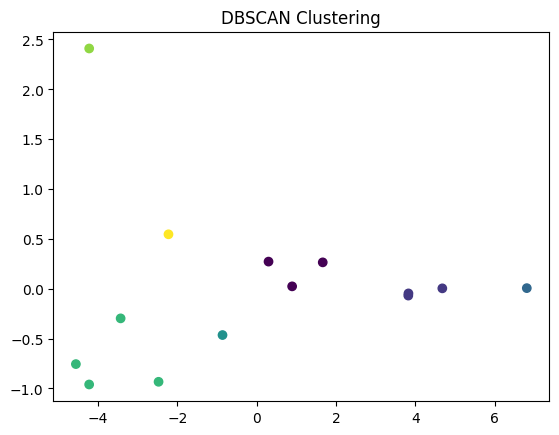

In [116]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(z_score.values)

# Create a scatter plot
plt.scatter(result[:, 0], result[:, 1], c=labels, cmap='viridis')

plt.title('DBSCAN Clustering')
plt.show()

In [53]:
# agg_corr_matrix

In [56]:
spearman_corr_matrix = new_df.corr(method='spearman')

print(spearman_corr_matrix)

                           DV003 Monolingual  GPT-3.5-Turbo Monolingual  \
DV003 Monolingual                   1.000000                   0.946429   
GPT-3.5-Turbo Monolingual           0.946429                   1.000000   
GPT-4 Monolingual                   0.885714                   0.967857   
TULRv6                              0.919501                   0.928445   
BLOOMZ                              0.407143                   0.417857   
XLM-R                               0.925000                   0.907143   
mBERT                               0.891868                   0.866846   
XGLM                                0.496429                   0.492857   
mT5                                 0.940125                   0.906167   
Llama2-7B Monolingual               0.908451                   0.852795   
Llama2-13B Monolingual              0.840987                   0.778093   
Llama2-70B Monolingual              0.903232                   0.835131   
Mistral-7B-Instruct-v0.1 

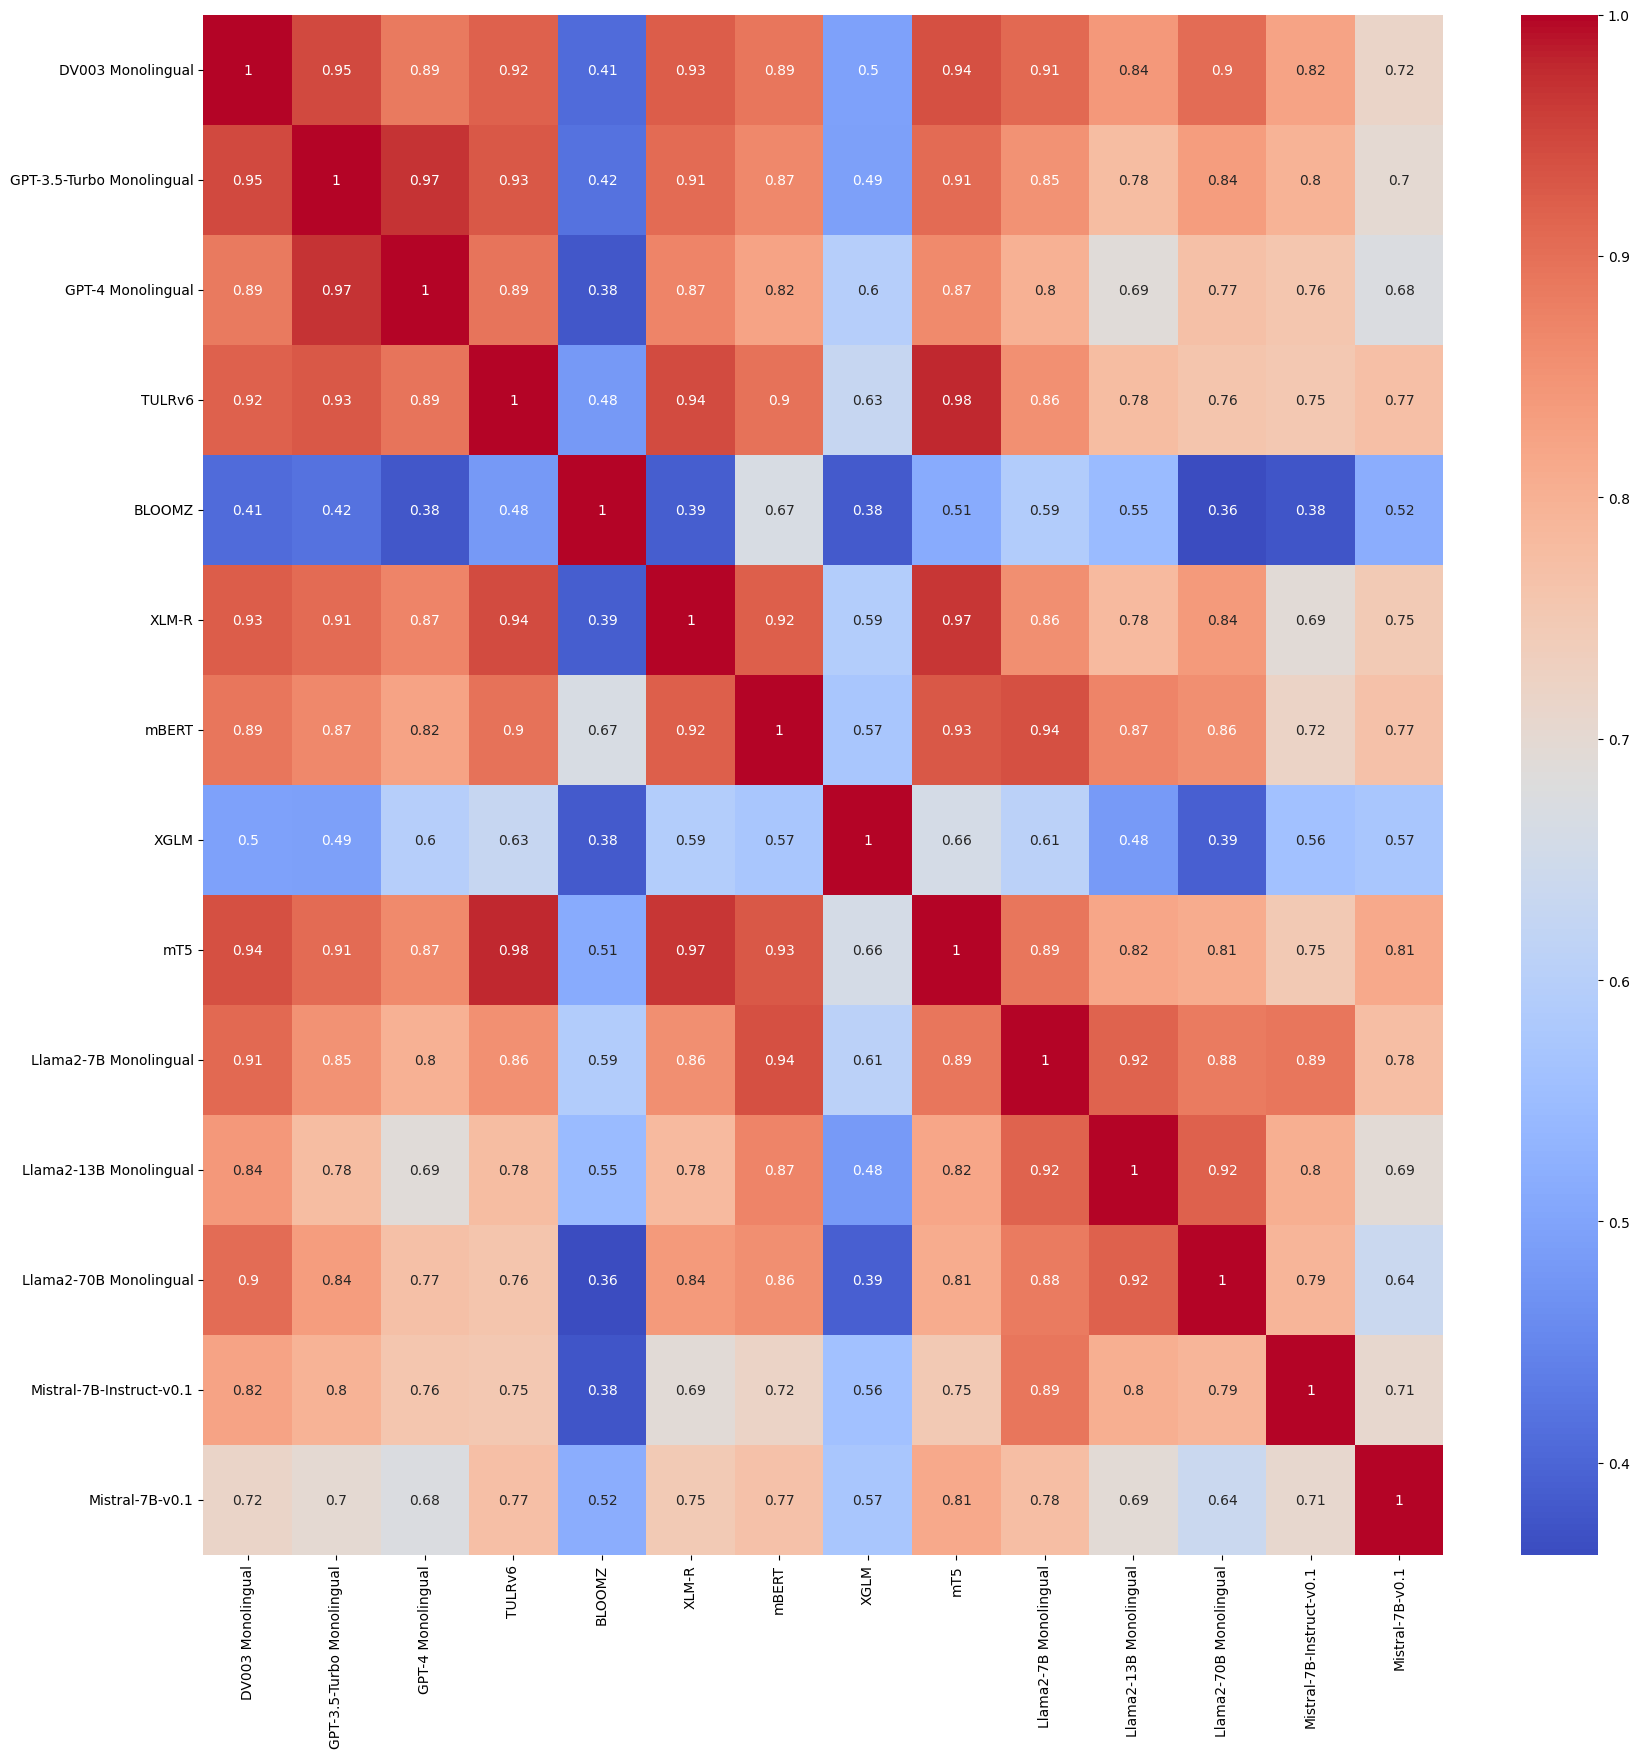

In [57]:
import seaborn as sns

import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))


# Assuming spearman_corr_matrix is your correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [62]:
new_df = df[df['Dataset'] == "XQuAD"]

# Assuming new_df is your DataFrame
non_nan_columns = new_df.columns[new_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = new_df[non_nan_monolingual_columns]


new_df = new_df.iloc[:, 6:-3]

spearman_corr_matrix = new_df.corr(method='spearman')


['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'BLOOMZ', 'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual', 'Llama2-70B Monolingual', 'Mistral-7B-Instruct-v0.1', 'Mistral-7B-v0.1', 'Metrics_x', 'Direction', 'Metrics']


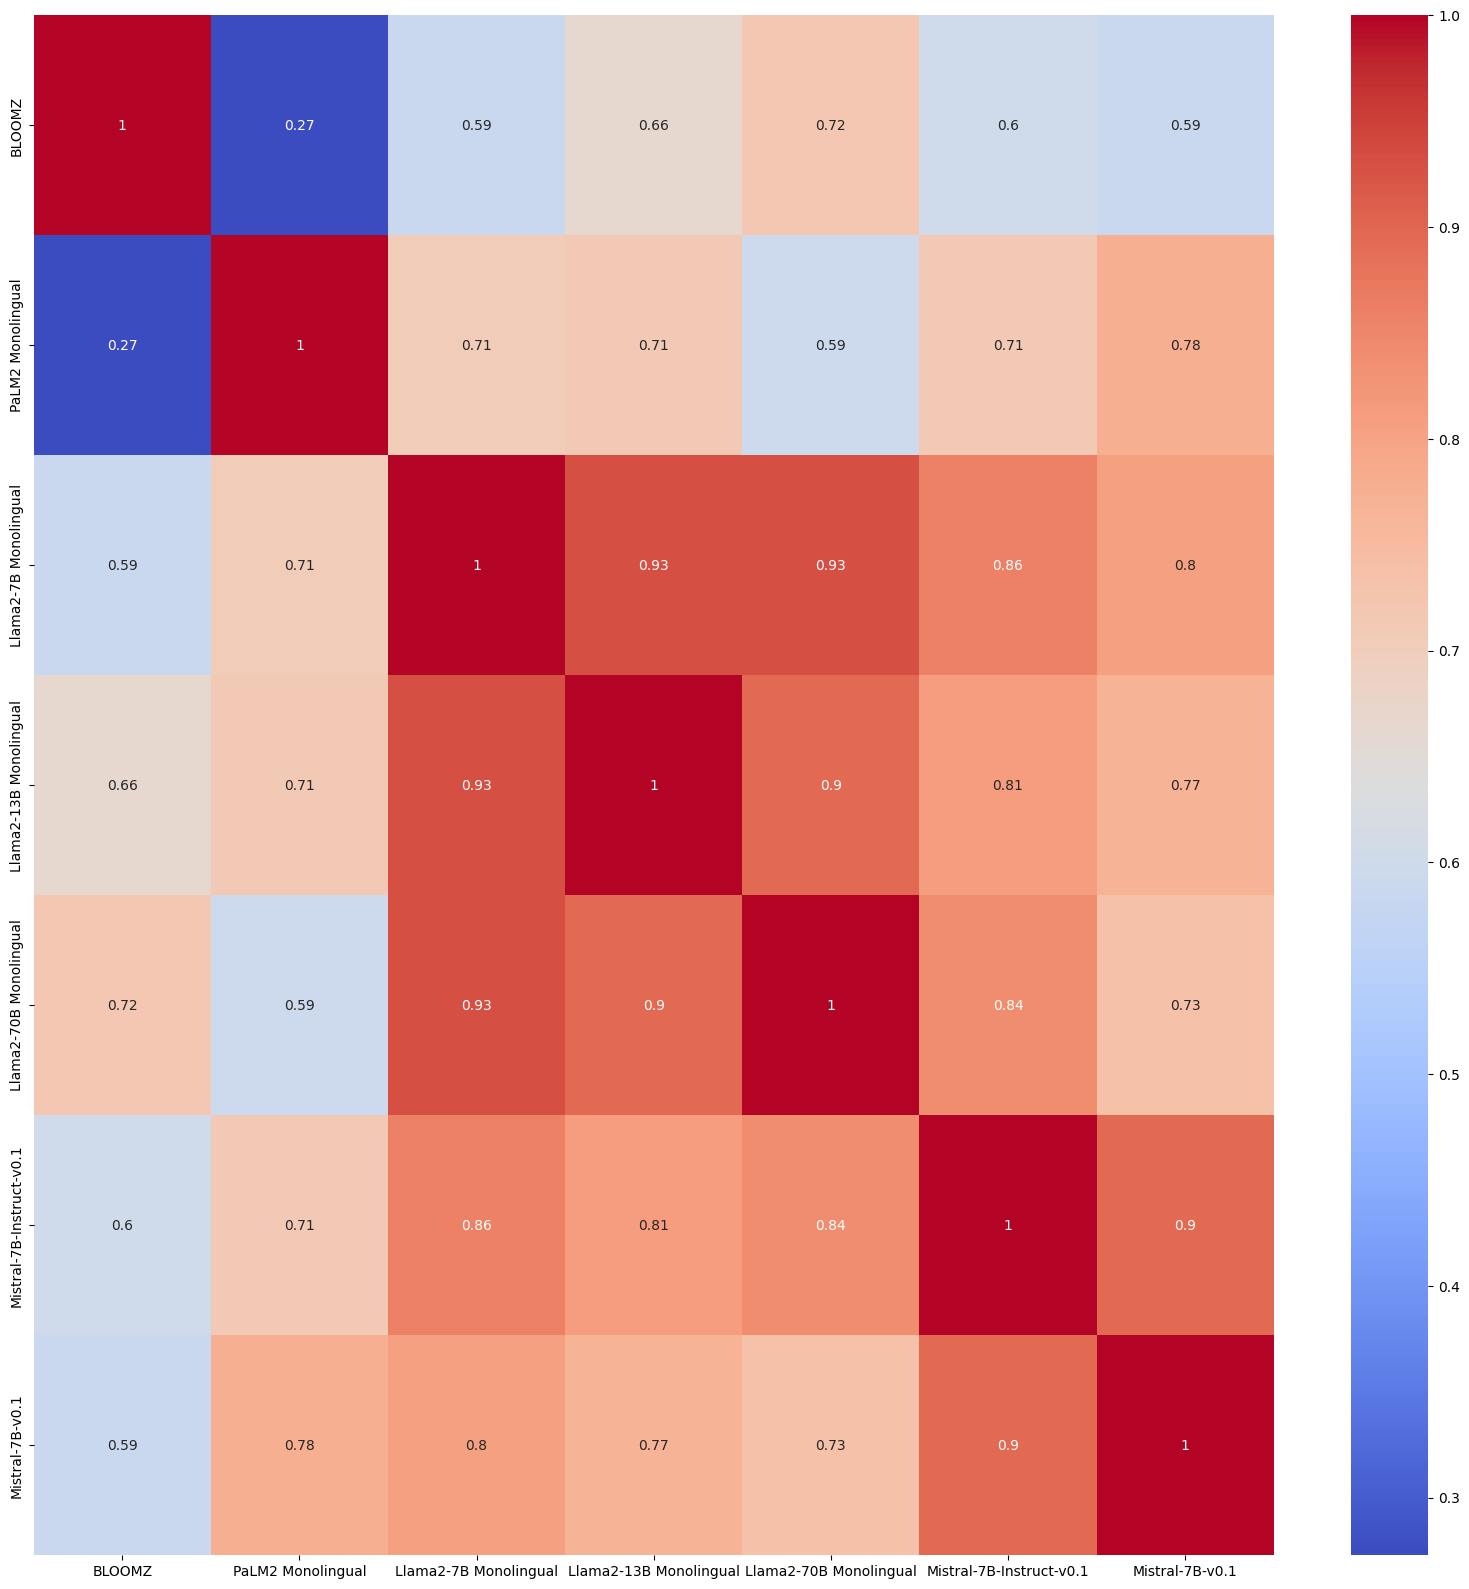

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))


# Assuming spearman_corr_matrix is your correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [65]:
df['Dataset'].unique()

array(['AfriQA', 'Belebele', 'GLUECoS-NLI', 'GLUECoS-SA',
       'IN22_conv_en_indic', 'IN22_conv_indic_en', 'IN22_gen_indic_en',
       'IN22_gen_en_indic', 'IndicQA', 'IndicXNLI', 'Jigsaw', 'MARVL',
       'MLQA', 'PAN-X', 'PAWS-X', 'TyDiQA-GoldP', 'UDPOS', 'WinoMT',
       'XCOPA', 'XLSum', 'XM3600', 'XNLI', 'XQuAD', 'X-RiSAWOZ',
       'XstoryCloze'], dtype=object)

['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'DV003 Monolingual', 'GPT-3.5-Turbo Monolingual', 'GPT-4 Monolingual', 'BLOOMZ', 'XGLM', 'Metrics_x', 'Direction', 'Metrics']


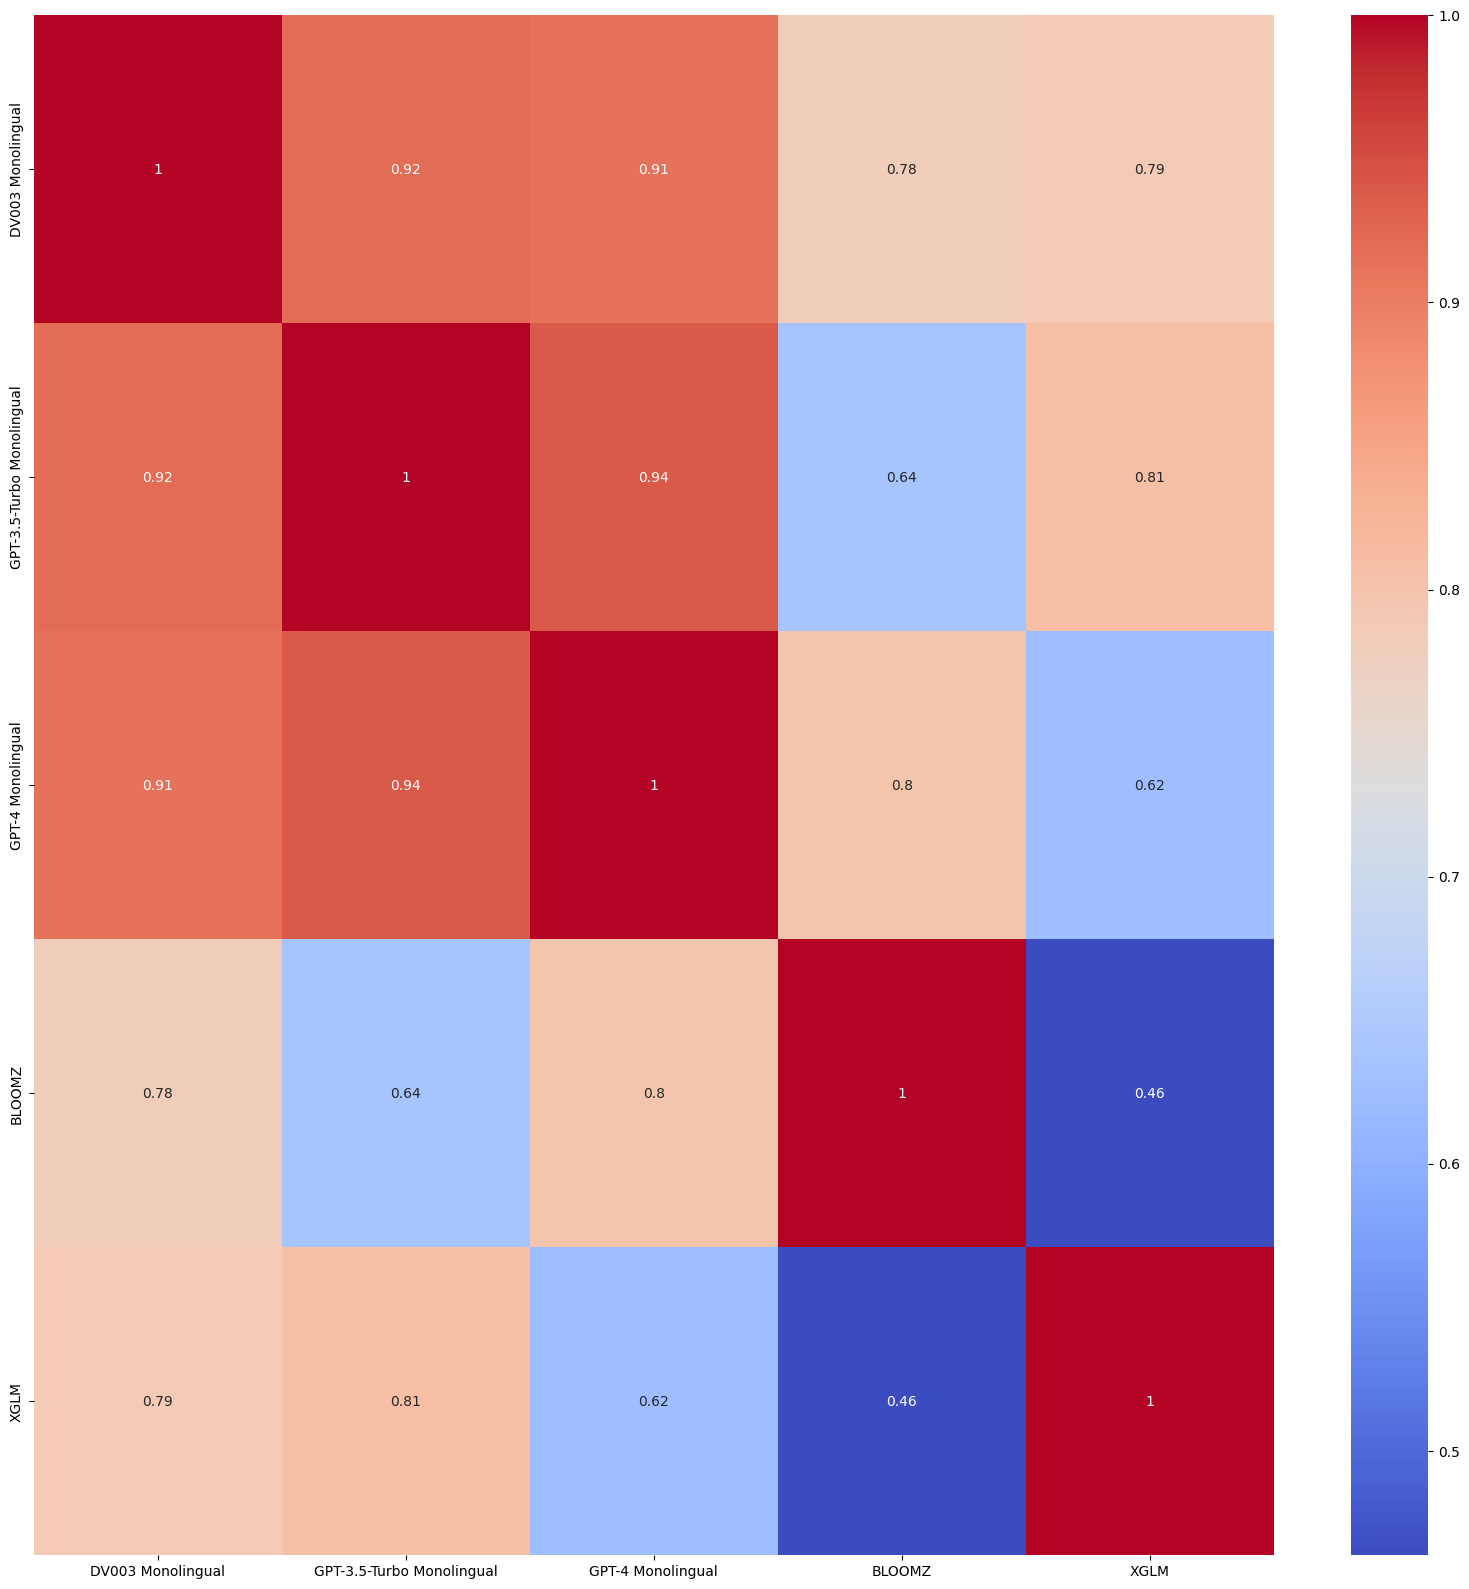

Bad pipe message: %s [b'\x9c\r}K.EH\xb0\xfa\xe6b\xb7\xb6\xa0\xf0ca\xf9 \xd8\xe7\xb0+k\xbd\x92M\xe1\xbe\xe6j\xa1\xaf\x8e\x07\t\x0b\x8ex\xb9Toq\xa5NX\x16N*Xn\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x03\xf3\xde\xd6\xd2\x00\xf7\x19\x86\x03\xacz\xa9z\x93l']
Bad pipe message: %s [b'\x94l\xdb\xc6 \xbb\xb2\x92p\x97<\xc0\xd034\xb1\xbe\t \xf5\xd9\xed\xbc%\xd1\xc2\x8e:\x8dVr+\x13\x13\x8e\x9f\xea\x95\xfa\x92\xd9\xd4**\xca\xd3\x04\xe2 \xc4\x94\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.']
Bad pipe message: %s [b'1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00

In [67]:
new_df = df[df['Dataset'] == "XstoryCloze"]

# Assuming new_df is your DataFrame
non_nan_columns = new_df.columns[new_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = new_df[non_nan_monolingual_columns]


new_df = new_df.iloc[:, 6:-3]

spearman_corr_matrix = new_df.corr(method='spearman')


plt.figure(figsize=(20, 20))


# Assuming spearman_corr_matrix is your correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

plt.show()


In [19]:
new_df = df[['Language'] + list(df.columns)[7:-3]]

new_df.fillna(0).groupby('Language').mean().reset_index()

,Language,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,IndicTrans2,GPT-3.5-Turbo Monolingual,GPT-3.5-Turbo Translate-Test,GPT-3.5-Turbo Zero-Shot Cross Lingual,GPT-4 Monolingual,GPT-4 Translate-Test,...,Llama2-70B Monolingual,LLaVa-1.5-13B Monolingual,LLaVa-1.5-13B Translate-Test,Bing Translator,Google Translator,Systran,Mistral-7B-Instruct-v0.1,GPT4-V Monolingual,GPT4-V Translate-Test,Mistral-7B-v0.1
0,Afrikaans,0.000000,0.000000,0.000000,0.000,0.590724,0.000000,0.000000,0.667778,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Amharic,0.000000,0.000000,0.000000,0.000,0.094000,0.033494,0.000000,0.168500,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,Arabic,0.296319,0.189323,0.211888,0.000,0.445183,0.177074,0.193912,0.462245,0.1723,...,0.107659,0.003917,0.0,0.040909,0.041636,0.041455,0.100166,0.033307,0.0,0.113042
3,Assamese,0.080971,0.093313,0.081153,0.371,0.326502,0.090486,0.058860,0.445222,0.0000,...,0.071833,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Azerbaijani,0.000000,0.000000,0.000000,0.000,0.289449,0.000000,0.000000,0.375622,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Vietnamese,0.148743,0.168321,0.140339,0.000,0.331269,0.178175,0.186513,0.415860,0.0000,...,0.197057,0.000000,0.0,0.000000,0.000000,0.000000,0.223200,0.000000,0.0,0.256034
79,Welsh,0.000000,0.000000,0.000000,0.000,0.218900,0.216901,0.000000,0.255100,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
80,Wolof,0.000000,0.000000,0.000000,0.000,0.276351,0.000000,0.000000,0.353471,0.0000,...,0.002000,0.000000,0.0,0.000000,0.000000,0.000000,0.005525,0.000000,0.0,0.003867
81,Yoruba,0.000000,0.000000,0.000000,0.000,0.241933,0.000000,0.000000,0.380526,0.0000,...,0.007500,0.000000,0.0,0.000000,0.000000,0.000000,0.001171,0.000000,0.0,0.003559


In [6]:
new_df.columns

Index(['Dataset', 'Task', 'Language', 'Language Tier', 'Language Code',
       'Language Class', 'Language Script', 'DV003 Monolingual',
       'DV003 TranslateTest', 'DV003 Zero-Shot Cross Lingual', 'IndicTrans2',
       'GPT-3.5-Turbo Monolingual', 'GPT-3.5-Turbo Translate-Test',
       'GPT-3.5-Turbo Zero-Shot Cross Lingual', 'GPT-4 Monolingual',
       'GPT-4 Translate-Test', 'GPT-4 Zero-Shot Cross Lingual', 'TULRv6',
       'BLOOMZ', 'XLM-R', 'mBERT', 'MuRIL', 'XGLM', 'mT5', 'PaLM2 Zero-Shot',
       'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual',
       'Llama2-70B Monolingual', 'LLaVa-1.5-13B Monolingual',
       'LLaVa-1.5-13B Translate-Test', 'Bing Translator', 'Google Translator',
       'Systran', 'Metrics', 'Direction'],
      dtype='object')

In [7]:
rho, p_value = stats.spearmanr(new_df['GPT-3.5-Turbo Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: 0.9679
P-value: 0.0000


In [8]:
rho, p_value = stats.spearmanr(new_df['PaLM2 Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: 0.6893
P-value: 0.0045


In [9]:
new_df = df[df['Dataset'] == "Belebele"].fillna(0)

new_df

,Dataset,Task,Language,Language Tier,Language Code,Language Class,Language Script,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,...,Llama2-7B Monolingual,Llama2-13B Monolingual,Llama2-70B Monolingual,LLaVa-1.5-13B Monolingual,LLaVa-1.5-13B Translate-Test,Bing Translator,Google Translator,Systran,Metrics,Direction
10,Belebele,Multiple Choice Reading Comprehension,Arabic,2.0,ar,5.0,Arabic,0.9178,0.0,0.0,...,0.0,0.0,0.423,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
11,Belebele,Multiple Choice Reading Comprehension,Czech,0.0,cs,0.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.650,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
12,Belebele,Multiple Choice Reading Comprehension,Danish,0.0,da,0.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.662,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
13,Belebele,Multiple Choice Reading Comprehension,German,1.0,de,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.694,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
14,Belebele,Multiple Choice Reading Comprehension,English,0.0,en,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.788,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
15,Belebele,Multiple Choice Reading Comprehension,Spanish,1.0,es,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.684,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
16,Belebele,Multiple Choice Reading Comprehension,Finnish,2.0,fi,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.627,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
17,Belebele,Multiple Choice Reading Comprehension,French,1.0,fr,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.722,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
18,Belebele,Multiple Choice Reading Comprehension,Hebrew,2.0,he,3.0,Hebrew,0.0000,0.0,0.0,...,0.0,0.0,0.414,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
19,Belebele,Multiple Choice Reading Comprehension,Hungarian,2.0,hu,4.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.611,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter


In [10]:
new_df.columns

Index(['Dataset', 'Task', 'Language', 'Language Tier', 'Language Code',
       'Language Class', 'Language Script', 'DV003 Monolingual',
       'DV003 TranslateTest', 'DV003 Zero-Shot Cross Lingual', 'IndicTrans2',
       'GPT-3.5-Turbo Monolingual', 'GPT-3.5-Turbo Translate-Test',
       'GPT-3.5-Turbo Zero-Shot Cross Lingual', 'GPT-4 Monolingual',
       'GPT-4 Translate-Test', 'GPT-4 Zero-Shot Cross Lingual', 'TULRv6',
       'BLOOMZ', 'XLM-R', 'mBERT', 'MuRIL', 'XGLM', 'mT5', 'PaLM2 Zero-Shot',
       'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual',
       'Llama2-70B Monolingual', 'LLaVa-1.5-13B Monolingual',
       'LLaVa-1.5-13B Translate-Test', 'Bing Translator', 'Google Translator',
       'Systran', 'Metrics', 'Direction'],
      dtype='object')

In [11]:
rho, p_value = stats.spearmanr(new_df['GPT-3.5-Turbo Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: -0.2816
P-value: 0.1930


In [12]:
rho, p_value = stats.spearmanr(new_df['PaLM2 Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: -0.1523
P-value: 0.4879
